## Experiment : Running Gradient Boosting for the raw data 
- Run 4 different Gradient Boosting models, CatBoost, XGBoost, LightGBM and HistGradientBoosting, for DATA_Texas_District_v3.csv specifying the indices of categorical features for models to handle them except XGBoost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# import warnings 
# warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [3]:
cols_drop=['County #',
'District #',
'r_all_d_g3_2019',
'r_ethh_d_g3_2019',
'r_etha_d_g3_2019',
'r_ethb_d_g3_2019',
'r_ethw_d_g3_2019',
'r_ecoy_d_g3_2019',
'r_eco1_d_g3_2019',
'r_ti1y_d_g3_2019',
'r_spey_d_g3_2019',
'r_all_d_g4_2019',
'r_ethh_d_g4_2019',
'r_etha_d_g4_2019',
'r_ethb_d_g4_2019',
'r_ethw_d_g4_2019',
'r_ecoy_d_g4_2019',
'r_eco1_d_g4_2019',
'r_ti1y_d_g4_2019',
'r_spey_d_g4_2019',
'r_all_d_g5_2019',
'r_ethh_d_g5_2019',
'r_etha_d_g5_2019',
'r_ethb_d_g5_2019',
'r_ethw_d_g5_2019',
'r_ecoy_d_g5_2019',
'r_eco1_d_g5_2019',
'r_ti1y_d_g5_2019',
'r_spey_d_g5_2019',
'r_all_d_g6_2019',
'r_ethh_d_g6_2019',
'r_etha_d_g6_2019',
'r_ethb_d_g6_2019',
'r_ethw_d_g6_2019',
'r_ecoy_d_g6_2019',
'r_eco1_d_g6_2019',
'r_ti1y_d_g6_2019',
'r_spey_d_g6_2019',
'r_all_d_g7_2019',
'r_ethh_d_g7_2019',
'r_etha_d_g7_2019',
'r_ethb_d_g7_2019',
'r_ethw_d_g7_2019',
'r_ecoy_d_g7_2019',
'r_eco1_d_g7_2019',
'r_ti1y_d_g7_2019',
'r_spey_d_g7_2019',
'r_all_d_g8_2019',
'r_ethh_d_g8_2019',
'r_etha_d_g8_2019',
'r_ethb_d_g8_2019',
'r_ethw_d_g8_2019',
'r_ecoy_d_g8_2019',
'r_eco1_d_g8_2019',
'r_ti1y_d_g8_2019',
'r_spey_d_g8_2019',
'r_all_d_g3_2021',
'r_ethh_d_g3_2021',
'r_etha_d_g3_2021',
'r_ethb_d_g3_2021',
'r_ethw_d_g3_2021',
'r_ecoy_d_g3_2021',
'r_eco1_d_g3_2021',
'r_ti1y_d_g3_2021',
'r_spey_d_g3_2021',
'r_all_d_g4_2021',
'r_ethh_d_g4_2021',
'r_etha_d_g4_2021',
'r_ethb_d_g4_2021',
'r_ethw_d_g4_2021',
'r_ecoy_d_g4_2021',
'r_eco1_d_g4_2021',
'r_ti1y_d_g4_2021',
'r_spey_d_g4_2021',
'r_all_d_g5_2021',
'r_ethh_d_g5_2021',
'r_etha_d_g5_2021',
'r_ethb_d_g5_2021',
'r_ethw_d_g5_2021',
'r_ecoy_d_g5_2021',
'r_eco1_d_g5_2021',
'r_ti1y_d_g5_2021',
'r_spey_d_g5_2021',
'r_all_d_g6_2021',
'r_ethh_d_g6_2021',
'r_etha_d_g6_2021',
'r_ethb_d_g6_2021',
'r_ethw_d_g6_2021',
'r_ecoy_d_g6_2021',
'r_eco1_d_g6_2021',
'r_ti1y_d_g6_2021',
'r_spey_d_g6_2021',
'r_all_d_g7_2021',
'r_ethh_d_g7_2021',
'r_etha_d_g7_2021',
'r_ethb_d_g7_2021',
'r_ethw_d_g7_2021',
'r_ecoy_d_g7_2021',
'r_eco1_d_g7_2021',
'r_ti1y_d_g7_2021',
'r_spey_d_g7_2021',
'r_all_d_g8_2021',
'r_ethh_d_g8_2021',
'r_etha_d_g8_2021',
'r_ethb_d_g8_2021',
'r_ethw_d_g8_2021',
'r_ecoy_d_g8_2021',
'r_eco1_d_g8_2021',
'r_ti1y_d_g8_2021',
'r_spey_d_g8_2021',
'Average Score Reading Hispanic Grade 3 2018-2019',
'Average Score Reading Asian Grade 3 2018-2019',
'Average Score Reading Black Grade 3 2018-2019',
'Average Score Reading White Grade 3 2018-2019',
'Average Score Reading Poverty Grade 3 2018-2019',
'Average Score Reading Free Lunch Grade 3 2018-2019',
'Average Score Reading T1 Grade 3 2018-2019',
'Average Score Reading Special Ed Grade 3 2018-2019',
'Average Score Reading Hispanic Grade 4 2018-2019',
'Average Score Reading Asian Grade 4 2018-2019',
'Average Score Reading Black Grade 4 2018-2019',
'Average Score Reading White Grade 4 2018-2019',
'Average Score Reading Poverty Grade 4 2018-2019',
'Average Score Reading Free Lunch Grade 4 2018-2019',
'Average Score Reading T1 Grade 4 2018-2019',
'Average Score Reading Special Ed Grade 4 2018-2019',
'Average Score Reading Hispanic Grade 5 2018-2019',
'Average Score Reading Asian Grade 5 2018-2019',
'Average Score Reading Black Grade 5 2018-2019',
'Average Score Reading White Grade 5 2018-2019',
'Average Score Reading Poverty Grade 5 2018-2019',
'Average Score Reading Free Lunch Grade 5 2018-2019',
'Average Score Reading T1 Grade 5 2018-2019',
'Average Score Reading Special Ed Grade 5 2018-2019',
'Average Score Reading Hispanic Grade 6 2018-2019',
'Average Score Reading Asian Grade 6 2018-2019',
'Average Score Reading Black Grade 6 2018-2019',
'Average Score Reading White Grade 6 2018-2019',
'Average Score Reading Poverty Grade 6 2018-2019',
'Average Score Reading Free Lunch Grade 6 2018-2019',
'Average Score Reading T1 Grade 6 2018-2019',
'Average Score Reading Special Ed Grade 6 2018-2019',
'Average Score Reading Hispanic Grade 7 2018-2019',
'Average Score Reading Asian Grade 7 2018-2019',
'Average Score Reading Black Grade 7 2018-2019',
'Average Score Reading White Grade 7 2018-2019',
'Average Score Reading Poverty Grade 7 2018-2019',
'Average Score Reading Free Lunch Grade 7 2018-2019',
'Average Score Reading T1 Grade 7 2018-2019',
'Average Score Reading Special Ed Grade 7 2018-2019',
'Average Score Reading Hispanic Grade 8 2018-2019',
'Average Score Reading Asian Grade 8 2018-2019',
'Average Score Reading Black Grade 8 2018-2019',
'Average Score Reading White Grade 8 2018-2019',
'Average Score Reading Poverty Grade 8 2018-2019',
'Average Score Reading Free Lunch Grade 8 2018-2019',
'Average Score Reading T1 Grade 8 2018-2019',
'Average Score Reading Special Ed Grade 8 2018-2019',
'Average Score Reading Hispanic Grade 3 2020-2021',
'Average Score Reading Asian Grade 3 2020-2021',
'Average Score Reading Black Grade 3 2020-2021',
'Average Score Reading White Grade 3 2020-2021',
'Average Score Reading Poverty Grade 3 2020-2021',
'Average Score Reading Free Lunch Grade 3 2020-2021',
'Average Score Reading T1 Grade 3 2020-2021',
'Average Score Reading Special Ed Grade 3 2020-2021',
'Average Score Reading Hispanic Grade 4 2020-2021',
'Average Score Reading Asian Grade 4 2020-2021',
'Average Score Reading Black Grade 4 2020-2021',
'Average Score Reading White Grade 4 2020-2021',
'Average Score Reading Poverty Grade 4 2020-2021',
'Average Score Reading Free Lunch Grade 4 2020-2021',
'Average Score Reading T1 Grade 4 2020-2021',
'Average Score Reading Special Ed Grade 4 2020-2021',
'Average Score Reading Hispanic Grade 5 2020-2021',
'Average Score Reading Asian Grade 5 2020-2021',
'Average Score Reading Black Grade 5 2020-2021',
'Average Score Reading White Grade 5 2020-2021',
'Average Score Reading Poverty Grade 5 2020-2021',
'Average Score Reading Free Lunch Grade 5 2020-2021',
'Average Score Reading T1 Grade 5 2020-2021',
'Average Score Reading Special Ed Grade 5 2020-2021',
'Average Score Reading Hispanic Grade 6 2020-2021',
'Average Score Reading Asian Grade 6 2020-2021',
'Average Score Reading Black Grade 6 2020-2021',
'Average Score Reading White Grade 6 2020-2021',
'Average Score Reading Poverty Grade 6 2020-2021',
'Average Score Reading Free Lunch Grade 6 2020-2021',
'Average Score Reading T1 Grade 6 2020-2021',
'Average Score Reading Special Ed Grade 6 2020-2021',
'Average Score Reading Hispanic Grade 7 2020-2021',
'Average Score Reading Asian Grade 7 2020-2021',
'Average Score Reading Black Grade 7 2020-2021',
'Average Score Reading White Grade 7 2020-2021',
'Average Score Reading Poverty Grade 7 2020-2021',
'Average Score Reading Free Lunch Grade 7 2020-2021',
'Average Score Reading T1 Grade 7 2020-2021',
'Average Score Reading Special Ed Grade 7 2020-2021',
'Average Score Reading Hispanic Grade 8 2020-2021',
'Average Score Reading Asian Grade 8 2020-2021',
'Average Score Reading Black Grade 8 2020-2021',
'Average Score Reading White Grade 8 2020-2021',
'Average Score Reading Poverty Grade 8 2020-2021',
'Average Score Reading Free Lunch Grade 8 2020-2021',
'Average Score Reading T1 Grade 8 2020-2021',
'Average Score Reading Special Ed Grade 8 2020-2021']

cols_imp_0= ['Grade 3 2020-2021',
'Grade 3 2018-2019',
'Grade 4 2020-2021',
'Grade 4 2018-2019',
'Grade 5 2020-2021',
'Grade 5 2018-2019',
'Grade 6 2020-2021',
'Grade 6 2018-2019',
'Grade 7 2020-2021',
'Grade 7 2018-2019',
'Grade 8 2020-2021',
'Grade 8 2018-2019',
'Prek 2020-2021',
'Prek 2018-2019',
'K 2020-2021',
'K 2018-2019',
'Grade 1 2020-2021',
'Grade 1 2018-2019',
'Grade 2 2020-2021',
'Grade 2 2018-2019',
'Grade 9 2020-2021',
'Grade 9 2018-2019',
'Grade 10 2020-2021',
'Grade 10 2018-2019',
'Grade 11 2020-2021',
'Grade 11 2018-2019',
'Grade 12 2020-2021',
'Grade 12 2018-2019']

cols_imp_avg=['m_all_d_g3_2019',
'm_ethh_d_g3_2019',
'm_etha_d_g3_2019',
'm_ethb_d_g3_2019',
'm_ethw_d_g3_2019',
'm_ecoy_d_g3_2019',
'm_eco1_d_g3_2019',
'm_ti1y_d_g3_2019',
'm_spey_d_g3_2019',
'm_all_d_g4_2019',
'm_ethh_d_g4_2019',
'm_etha_d_g4_2019',
'm_ethb_d_g4_2019',
'm_ethw_d_g4_2019',
'm_ecoy_d_g4_2019',
'm_eco1_d_g4_2019',
'm_ti1y_d_g4_2019',
'm_spey_d_g4_2019',
'm_all_d_g5_2019',
'm_ethh_d_g5_2019',
'm_etha_d_g5_2019',
'm_ethb_d_g5_2019',
'm_ethw_d_g5_2019',
'm_ecoy_d_g5_2019',
'm_eco1_d_g5_2019',
'm_ti1y_d_g5_2019',
'm_spey_d_g5_2019',
'm_all_d_g6_2019',
'm_ethh_d_g6_2019',
'm_etha_d_g6_2019',
'm_ethb_d_g6_2019',
'm_ethw_d_g6_2019',
'm_ecoy_d_g6_2019',
'm_eco1_d_g6_2019',
'm_ti1y_d_g6_2019',
'm_spey_d_g6_2019',
'm_all_d_g7_2019',
'm_ethh_d_g7_2019',
'm_etha_d_g7_2019',
'm_ethb_d_g7_2019',
'm_ethw_d_g7_2019',
'm_ecoy_d_g7_2019',
'm_eco1_d_g7_2019',
'm_ti1y_d_g7_2019',
'm_spey_d_g7_2019',
'm_all_d_g8_2019',
'm_ethh_d_g8_2019',
'm_etha_d_g8_2019',
'm_ethb_d_g8_2019',
'm_ethw_d_g8_2019',
'm_ecoy_d_g8_2019',
'm_eco1_d_g8_2019',
'm_ti1y_d_g8_2019',
'm_spey_d_g8_2019',
'm_all_d_g3_2021',
'm_ethh_d_g3_2021',
'm_etha_d_g3_2021',
'm_ethb_d_g3_2021',
'm_ethw_d_g3_2021',
'm_ecoy_d_g3_2021',
'm_eco1_d_g3_2021',
'm_ti1y_d_g3_2021',
'm_spey_d_g3_2021',
'm_all_d_g4_2021',
'm_ethh_d_g4_2021',
'm_etha_d_g4_2021',
'm_ethb_d_g4_2021',
'm_ethw_d_g4_2021',
'm_ecoy_d_g4_2021',
'm_eco1_d_g4_2021',
'm_ti1y_d_g4_2021',
'm_spey_d_g4_2021',
'm_all_d_g5_2021',
'm_ethh_d_g5_2021',
'm_etha_d_g5_2021',
'm_ethb_d_g5_2021',
'm_ethw_d_g5_2021',
'm_ecoy_d_g5_2021',
'm_eco1_d_g5_2021',
'm_ti1y_d_g5_2021',
'm_spey_d_g5_2021',
'm_all_d_g6_2021',
'm_ethh_d_g6_2021',
'm_etha_d_g6_2021',
'm_ethb_d_g6_2021',
'm_ethw_d_g6_2021',
'm_ecoy_d_g6_2021',
'm_eco1_d_g6_2021',
'm_ti1y_d_g6_2021',
'm_spey_d_g6_2021',
'm_all_d_g7_2021',
'm_ethh_d_g7_2021',
'm_etha_d_g7_2021',
'm_ethb_d_g7_2021',
'm_ethw_d_g7_2021',
'm_ecoy_d_g7_2021',
'm_eco1_d_g7_2021',
'm_ti1y_d_g7_2021',
'm_spey_d_g7_2021',
'm_all_d_g8_2021',
'm_ethh_d_g8_2021',
'm_etha_d_g8_2021',
'm_ethb_d_g8_2021',
'm_ethw_d_g8_2021',
'm_ecoy_d_g8_2021',
'm_eco1_d_g8_2021',
'm_ti1y_d_g8_2021',
'm_spey_d_g8_2021',
'District Enrollment 09/28/20',
'Approx. District On-Campus Enrollment 09/28/20',
'Average Score Math Hispanic Grade 3 2018-2019',
'Average Score Math Asian Grade 3 2018-2019',
'Average Score Math Black Grade 3 2018-2019',
'Average Score Math White Grade 3 2018-2019',
'Average Score Math Poverty Grade 3 2018-2019',
'Average Score Math Free Lunch Grade 3 2018-2019',
'Average Score Math T1 Grade 3 2018-2019',
'Average Score Math Special Ed Grade 3 2018-2019',
'Average Score Math Hispanic Grade 4 2018-2019',
'Average Score Math Asian Grade 4 2018-2019',
'Average Score Math Black Grade 4 2018-2019',
'Average Score Math White Grade 4 2018-2019',
'Average Score Math Poverty Grade 4 2018-2019',
'Average Score Math Free Lunch Grade 4 2018-2019',
'Average Score Math T1 Grade 4 2018-2019',
'Average Score Math Special Ed Grade 4 2018-2019',
'Average Score Math Hispanic Grade 5 2018-2019',
'Average Score Math Asian Grade 5 2018-2019',
'Average Score Math Black Grade 5 2018-2019',
'Average Score Math White Grade 5 2018-2019',
'Average Score Math Poverty Grade 5 2018-2019',
'Average Score Math Free Lunch Grade 5 2018-2019',
'Average Score Math T1 Grade 5 2018-2019',
'Average Score Math Special Ed Grade 5 2018-2019',
'Average Score Math Hispanic Grade 6 2018-2019',
'Average Score Math Asian Grade 6 2018-2019',
'Average Score Math Black Grade 6 2018-2019',
'Average Score Math White Grade 6 2018-2019',
'Average Score Math Poverty Grade 6 2018-2019',
'Average Score Math Free Lunch Grade 6 2018-2019',
'Average Score Math T1 Grade 6 2018-2019',
'Average Score Math Special Ed Grade 6 2018-2019',
'Average Score Math Hispanic Grade 7 2018-2019',
'Average Score Math Asian Grade 7 2018-2019',
'Average Score Math Black Grade 7 2018-2019',
'Average Score Math White Grade 7 2018-2019',
'Average Score Math Poverty Grade 7 2018-2019',
'Average Score Math Free Lunch Grade 7 2018-2019',
'Average Score Math T1 Grade 7 2018-2019',
'Average Score Math Special Ed Grade 7 2018-2019',
'Average Score Math Hispanic Grade 8 2018-2019',
'Average Score Math Asian Grade 8 2018-2019',
'Average Score Math Black Grade 8 2018-2019',
'Average Score Math White Grade 8 2018-2019',
'Average Score Math Poverty Grade 8 2018-2019',
'Average Score Math Free Lunch Grade 8 2018-2019',
'Average Score Math T1 Grade 8 2018-2019',
'Average Score Math Special Ed Grade 8 2018-2019',
'Average Score Math Hispanic Grade 3 2020-2021',
'Average Score Math Asian Grade 3 2020-2021',
'Average Score Math Black Grade 3 2020-2021',
'Average Score Math White Grade 3 2020-2021',
'Average Score Math Poverty Grade 3 2020-2021',
'Average Score Math Free Lunch Grade 3 2020-2021',
'Average Score Math T1 Grade 3 2020-2021',
'Average Score Math Special Ed Grade 3 2020-2021',
'Average Score Math Hispanic Grade 4 2020-2021',
'Average Score Math Asian Grade 4 2020-2021',
'Average Score Math Black Grade 4 2020-2021',
'Average Score Math White Grade 4 2020-2021',
'Average Score Math Poverty Grade 4 2020-2021',
'Average Score Math Free Lunch Grade 4 2020-2021',
'Average Score Math T1 Grade 4 2020-2021',
'Average Score Math Special Ed Grade 4 2020-2021',
'Average Score Math Hispanic Grade 5 2020-2021',
'Average Score Math Asian Grade 5 2020-2021',
'Average Score Math Black Grade 5 2020-2021',
'Average Score Math White Grade 5 2020-2021',
'Average Score Math Poverty Grade 5 2020-2021',
'Average Score Math Free Lunch Grade 5 2020-2021',
'Average Score Math T1 Grade 5 2020-2021',
'Average Score Math Special Ed Grade 5 2020-2021',
'Average Score Math Hispanic Grade 6 2020-2021',
'Average Score Math Asian Grade 6 2020-2021',
'Average Score Math Black Grade 6 2020-2021',
'Average Score Math White Grade 6 2020-2021',
'Average Score Math Poverty Grade 6 2020-2021',
'Average Score Math Free Lunch Grade 6 2020-2021',
'Average Score Math T1 Grade 6 2020-2021',
'Average Score Math Special Ed Grade 6 2020-2021',
'Average Score Math Hispanic Grade 7 2020-2021',
'Average Score Math Asian Grade 7 2020-2021',
'Average Score Math Black Grade 7 2020-2021',
'Average Score Math White Grade 7 2020-2021',
'Average Score Math Poverty Grade 7 2020-2021',
'Average Score Math Free Lunch Grade 7 2020-2021',
'Average Score Math T1 Grade 7 2020-2021',
'Average Score Math Special Ed Grade 7 2020-2021',
'Average Score Math Hispanic Grade 8 2020-2021',
'Average Score Math Asian Grade 8 2020-2021',
'Average Score Math Black Grade 8 2020-2021',
'Average Score Math White Grade 8 2020-2021',
'Average Score Math Poverty Grade 8 2020-2021',
'Average Score Math Free Lunch Grade 8 2020-2021',
'Average Score Math T1 Grade 8 2020-2021',
'Average Score Math Special Ed Grade 8 2020-2021']

### Prepare data ###

Loading the data cleaned from [Task5_MissingValues_Data_Integration.ipynb](../EDA/Task5_MissingValues_Data_Integration.ipynb)

In [4]:
df = pd.read_csv('../EDA/DATA_Texas_District_v3.csv', sep=',', header=0)
df.drop(columns=cols_drop, inplace=True)
print(df.shape)

(1176, 325)


Make values for label as a postive integer as some models cannot process negative class.

In [5]:
df['Label'] = df['Label_Math'].apply(lambda x: 0 if x == -1
                                                 else 1 if x == 0
                                                 else 2)

**Encoding**

In [6]:
def encoding (df, ver):
    
    #Common treatment for categorical feature 'Locale'
    categorical_cols = []
    df_temp=pd.get_dummies(df['Locale'], columns='Locale', prefix='Locale')
    for c in df_temp: categorical_cols.append(c)
    df.drop(columns=['Locale'], inplace=True)
    df=pd.concat([df, df_temp], axis=1)

    if ver==0: return df, categorical_cols

    imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    imp_avg = SimpleImputer(missing_values=np.nan, strategy='mean')
    
    df[cols_imp_0] = imp_0.fit_transform(df[cols_imp_0]) 
    df[cols_imp_avg] = imp_avg.fit_transform(df[cols_imp_avg]) 
    
    return df, categorical_cols

**Split data**

In [7]:
random_state=123

In [8]:
def split_data (df):
    labels = ['Label_Math', 'Label_Reading', 'Label_All']

    y = df['Label'].values.ravel()
    X = df.drop(columns=labels + ['Label'])
    columns = df.drop(columns=labels + ['Label']).columns.to_list()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=random_state, shuffle=True)
    
    return X_train, X_test, y_train, y_test, columns

**n iteration for models**

In [9]:
def get_n_iter (param_grid):
    n_iter_denom = 4
    n_iter = 1
    for v in param_grid.values(): n_iter*=len(v)
    n_iter /= n_iter_denom

    return int(n_iter)

### Modeling

In [10]:
encoding_type=['No Impute', 'Impute']
rounds = 20

In [11]:
def model_report(estimator, param_grid, fit_params, name, enc_ver, categorical=False):
    result = pd.DataFrame()
    avg = 'weighted'
    cv=5

    n_iter=get_n_iter(param_grid)
    print('{} n_iter: {:0.0f}'.format(name, n_iter))
    if name == 'CatBoost': n_iter=100
    
    df_copy, categorical_cols = encoding(df.copy(), enc_ver)
    X_train, X_test, y_train, y_test, columns = split_data(df_copy) 
    
    categorical_cols_idx = [columns.index(c) for c in categorical_cols]    

    if categorical:
        if (name == 'LightGBM'): fit_params['categorical_feature']=categorical_cols_idx
        if (name == 'CatBoost'): fit_params['cat_features']=categorical_cols_idx
        if (name == 'HistGB'): estimator.set_params(**{'categorical_features': categorical_cols_idx})

    if not categorical or len(categorical_cols) == 0: 
        if (name == 'LightGBM'): fit_params['categorical_feature']=None
        if (name == 'CatBoost'): fit_params['cat_features']=None
        if (name == 'HistGB'): estimator.set_params(**{'categorical_features': None})

     
    grid = RandomizedSearchCV(estimator, param_distributions=param_grid, cv=cv, n_jobs=-1, 
                          random_state=random_state, n_iter=n_iter)

    start_cpu = time.process_time()
    start_wall = time.time()

    if name == 'CatBoost':
        fit_params['eval_set'] =  [(X_test, y_test)]
        grid.fit(X_train, y_train, **fit_params)            
    elif name == 'HistGB': 
        grid.fit(X_train, y_train)
    else:
        fit_params['eval_set'] =  [(X_test.values, y_test)]
        grid.fit(X_train.values, y_train, **fit_params)     

    cpu_time = time.process_time() - start_cpu
    wall_time = time.time() - start_wall
    y_pred = grid.best_estimator_.predict(X_test)

    temp = {'Model': name,
            'enc_ver': encoding_type[enc_ver],
            'n features': len(columns),
            'n cat_features': len(categorical_cols),
            'best_params': grid.best_params_,
            'Best Accuracy': grid.best_score_, 
            'Train Accuracy': grid.best_estimator_.score(X_train, y_train),
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average=avg),
            'Recall': recall_score(y_test, y_pred, average=avg),
            'MCC': matthews_corrcoef(y_test, y_pred), 
            'F1': f1_score(y_test, y_pred, average=avg),
#                 'ROC': roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test), multi_class='ovr', average=avg),
            'conf_mat': confusion_matrix(y_test, y_pred), 
            'Prediction': y_pred,
            'predict_proba': grid.best_estimator_.predict_proba(X_test),
#             'Features': features,
            'estimator': grid.best_estimator_,
            'classification_report': classification_report(y_test, y_pred),
            'Train Time CPU': cpu_time,
            'Train Time Wall': wall_time,
            'n_iter': n_iter}
    result = pd.concat([result, pd.DataFrame([temp])], ignore_index=True)
    return result

In [12]:
results = pd.DataFrame()

**CatBoost**

In [13]:
%%time
from catboost import CatBoostClassifier

params = {'iterations': [50, 100, 200],
'depth': [3, 6, 9],
'min_data_in_leaf': [1, 5, 10],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_leaf_reg': [0, 0.01, 0.1, 1, 10],
'random_strength': [0, 5, 10, 15]}

fit_params = {'early_stopping_rounds': rounds}

estimator = CatBoostClassifier(random_seed=random_state, verbose=False, one_hot_max_size=256,
                               loss_function='MultiClass', eval_metric="MultiClass")

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'CatBoost', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

CatBoost n_iter: 540
CatBoost n_iter: 540
CPU times: total: 21min 7s
Wall time: 4h 2min 10s


**XGBoost**

In [14]:
%%time
import xgboost

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, 0],
'min_child_weight': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'alpha': [0,  0.1, 10],
'lambda': [0,  0.1, 10],
'gamma': [0,  0.1, 10]}

fit_params = {'early_stopping_rounds': rounds,
              'eval_metric': 'mlogloss'}

estimator = xgboost.XGBClassifier(seed=random_state, use_label_encoder=False, verbosity=0, slient=1,
                                  num_class=3, objective='multi:softmax')

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'XGBoost', i, False)
    results=pd.concat([results, result_report], ignore_index=True)

XGBoost n_iter: 972


C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[0]	validation_0-mlogloss:1.02765
[1]	validation_0-mlogloss:0.97851
[2]	validation_0-mlogloss:0.94068
[3]	validation_0-mlogloss:0.91456
[4]	validation_0-mlogloss:0.89178
[5]	validation_0-mlogloss:0.87264
[6]	validation_0-mlogloss:0.85504
[7]	validation_0-mlogloss:0.84270
[8]	validation_0-mlogloss:0.83442
[9]	validation_0-mlogloss:0.82759
[10]	validation_0-mlogloss:0.82666
[11]	validation_0-mlogloss:0.81668
[12]	validation_0-mlogloss:0.80898
[13]	validation_0-mlogloss:0.80072
[14]	validation_0-mlogloss:0.79237
[15]	validation_0-mlogloss:0.78704
[16]	validation_0-mlogloss:0.78744
[17]	validation_0-mlogloss:0.78408
[18]	validation_0-mlogloss:0.78057
[19]	validation_0-mlogloss:0.77627
[20]	validation_0-mlogloss:0.77666
[21]	validation_0-mlogloss:0.77090
[22]	validation_0-mlogloss:0.76899
[23]	validation_0-mlogloss:0.77024
[24]	validation_0-mlogloss:0.76700
[25]	validation_0-mlogloss:0.76574
[26]	validation_0-mlogloss:0.75920
[27]	validation_0-mlogloss:0.75560
[28]	validation_0-mlogloss:0.7

**LightGBM**

In [15]:
%%time
import lightgbm as lgb

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, -1],
'min_sum_hessian_in_leaf': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'reg_alpha': [0,  0.1, 10],
'reg_lambda': [0,  0.1, 10],
'min_split_gain': [0,  0.1, 10]}

fit_params = {'eval_metric': 'multi_logloss',
              'early_stopping_rounds': rounds}

estimator = lgb.LGBMClassifier(seed=random_state, verbosity=-1, silent=True, force_col_wise=True,
                               objective="multiclass", num_class=3, is_unbalance=True)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'LightGBM', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

LightGBM n_iter: 972


C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\sklearn.py", line 890, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\sklearn.py", line 683, in fit
  

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[1]	valid_0's multi_logloss: 0.975963
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 0.930603
[3]	valid_0's multi_logloss: 0.898226
[4]	valid_0's multi_logloss: 0.875896
[5]	valid_0's multi_logloss: 0.851978
[6]	valid_0's multi_logloss: 0.836012
[7]	valid_0's multi_logloss: 0.824126
[8]	valid_0's multi_logloss: 0.816706
[9]	valid_0's multi_logloss: 0.815323
[10]	valid_0's multi_logloss: 0.803397
[11]	valid_0's multi_logloss: 0.793947
[12]	valid_0's multi_logloss: 0.790435
[13]	valid_0's multi_logloss: 0.790437
[14]	valid_0's multi_logloss: 0.78434
[15]	valid_0's multi_logloss: 0.782683
[16]	valid_0's multi_logloss: 0.77745
[17]	valid_0's multi_logloss: 0.77566
[18]	valid_0's multi_logloss: 0.770933
[19]	valid_0's multi_logloss: 0.767271
[20]	valid_0's multi_logloss: 0.759188
[21]	valid_0's multi_logloss: 0

C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[1]	valid_0's multi_logloss: 0.916356
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 0.849102
[3]	valid_0's multi_logloss: 0.803676
[4]	valid_0's multi_logloss: 0.764183
[5]	valid_0's multi_logloss: 0.748524
[6]	valid_0's multi_logloss: 0.728082
[7]	valid_0's multi_logloss: 0.713784
[8]	valid_0's multi_logloss: 0.700458
[9]	valid_0's multi_logloss: 0.689914
[10]	valid_0's multi_logloss: 0.676485
[11]	valid_0's multi_logloss: 0.671877
[12]	valid_0's multi_logloss: 0.66394
[13]	valid_0's multi_logloss: 0.655752
[14]	valid_0's multi_logloss: 0.64284
[15]	valid_0's multi_logloss: 0.644894
[16]	valid_0's multi_logloss: 0.636222
[17]	valid_0's multi_logloss: 0.632808
[18]	valid_0's multi_logloss: 0.630525
[19]	valid_0's multi_logloss: 0.626684
[20]	valid_0's multi_logloss: 0.622519
[21]	valid_0's multi_logloss: 0.61

**HistGradientBoosting**

In [16]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier

params = {'max_iter': [50, 100, 200],
'max_depth': [1, 6, None],
'max_leaf_nodes': [10, 31, 50, 64],
'min_samples_leaf': [10, 20, 30],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_regularization': [0, 0.01, 0.1, 1, 10]}

fit_params = {}

estimator=HistGradientBoostingClassifier(random_state=random_state, n_iter_no_change=rounds, early_stopping=True)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'HistGB', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

HistGB n_iter: 540
HistGB n_iter: 540
CPU times: total: 53.1 s
Wall time: 1h 57min 19s


In [17]:
results.to_csv('Task5_NA_Modeling_GB_Math.csv', index=False)

## Result ##

In [18]:
results.sort_values(by=['MCC', 'F1'], ascending=False).head(10)[['Model', 'enc_ver', 'n features', 'n cat_features', 'Test Accuracy', 'Precision', 'Recall', 'MCC', 'F1', 'best_params']]

,Model,enc_ver,n features,n cat_features,Test Accuracy,Precision,Recall,MCC,F1,best_params
1,CatBoost,Impute,333,12,0.728814,0.728341,0.728814,0.557866,0.725576,"{'random_strength': 5, 'min_data_in_leaf': 1, ..."
0,CatBoost,No Impute,333,12,0.728814,0.731423,0.728814,0.557455,0.721655,"{'random_strength': 15, 'min_data_in_leaf': 5,..."
6,HistGB,No Impute,333,12,0.716102,0.714114,0.716102,0.536178,0.711295,"{'min_samples_leaf': 10, 'max_leaf_nodes': 10,..."
7,HistGB,Impute,333,12,0.711864,0.712745,0.711864,0.527647,0.705894,"{'min_samples_leaf': 20, 'max_leaf_nodes': 31,..."
3,XGBoost,Impute,333,12,0.707627,0.711331,0.707627,0.521777,0.704772,"{'n_estimators': 200, 'min_child_weight': 1, '..."
5,LightGBM,Impute,333,12,0.703390,0.700919,0.703390,0.517420,0.700279,"{'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estima..."
2,XGBoost,No Impute,333,12,0.699153,0.696785,0.699153,0.508412,0.694779,"{'n_estimators': 200, 'min_child_weight': 1, '..."
4,LightGBM,No Impute,333,12,0.690678,0.688811,0.690678,0.495402,0.687315,"{'reg_lambda': 10, 'reg_alpha': 0, 'n_estimato..."


**Accuracy, MCC and F1 Score**

In [19]:
results2 = pd.DataFrame()
for col in ['Train Accuracy', 'Test Accuracy', 'MCC', 'F1']:
    temp = results[['Model', 'enc_ver'] + [col]].copy()
    temp['Score'] = col
    temp.rename(columns={col: 'Score value'}, inplace=True)
    results2 = pd.concat([results2, temp], ignore_index=True)
# results2=results2.astype({'n Selected': 'int32'})

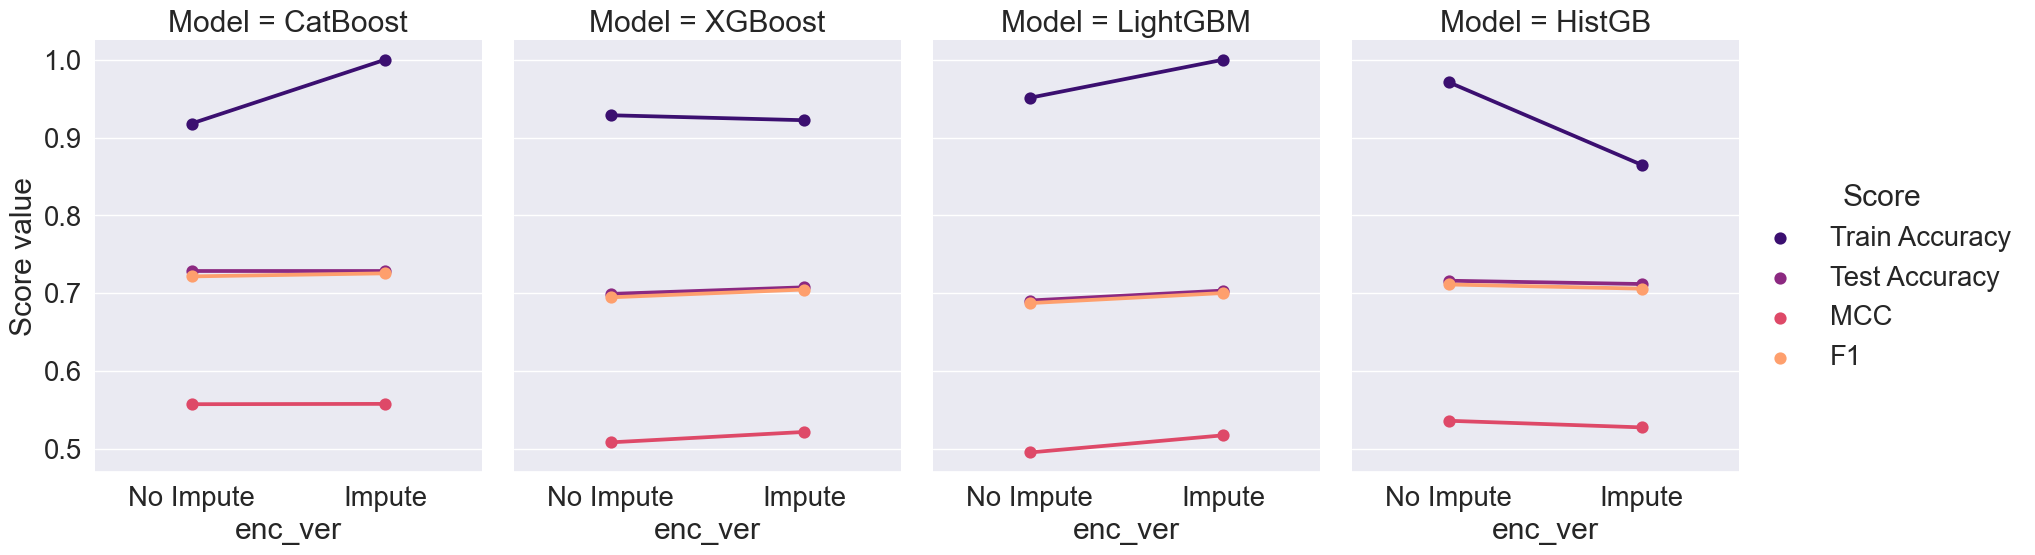

In [20]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.8)

g = sns.catplot(x="enc_ver", y="Score value", hue="Score", col="Model",
                capsize=.2, palette="magma", height=6, aspect=.75,
                kind="point", data=results2)
g.despine(left=True)
plt.show()

In [21]:
models = results['Model'].unique().tolist()
temp=results.sort_values(by=['Model', 'MCC', 'F1'], ascending=False)

n=len(encoding_type)
best_per_model_idx = []
for i in range(len(temp.index)):
    if i % n == 0: best_per_model_idx.append(temp.index[i])

**Confusion Matrix**

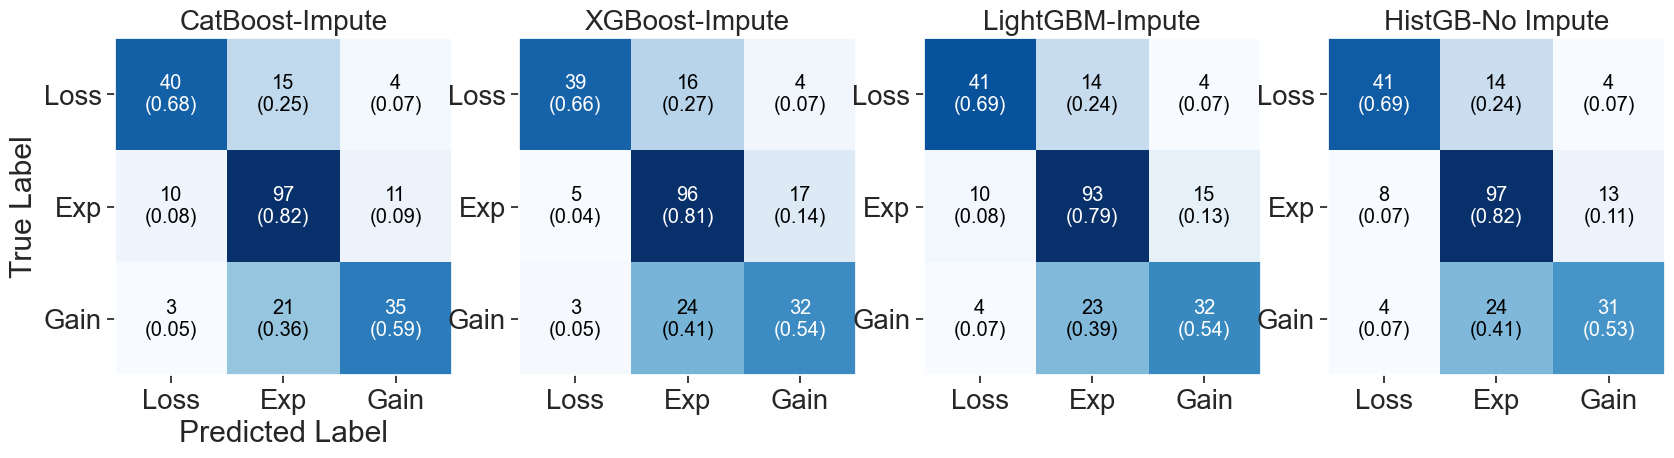

In [22]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

def ticks(x, position):
    if position == 1: return 'Loss'
    if position == 2: return 'Exp'
    if position == 3: return 'Gain'
    
fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,10))
sns.set(font_scale=1.2)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'],
                          show_absolute=True, show_normed=True)
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    if (i > 0): axes[i].set(xlabel='', ylabel='')
    else : axes[i].set(xlabel='Predicted Label', ylabel='True Label')
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(ticks))
    axes[i].yaxis.set_major_formatter(mticker.FuncFormatter(ticks))
plt.show()

**ROC Curve**

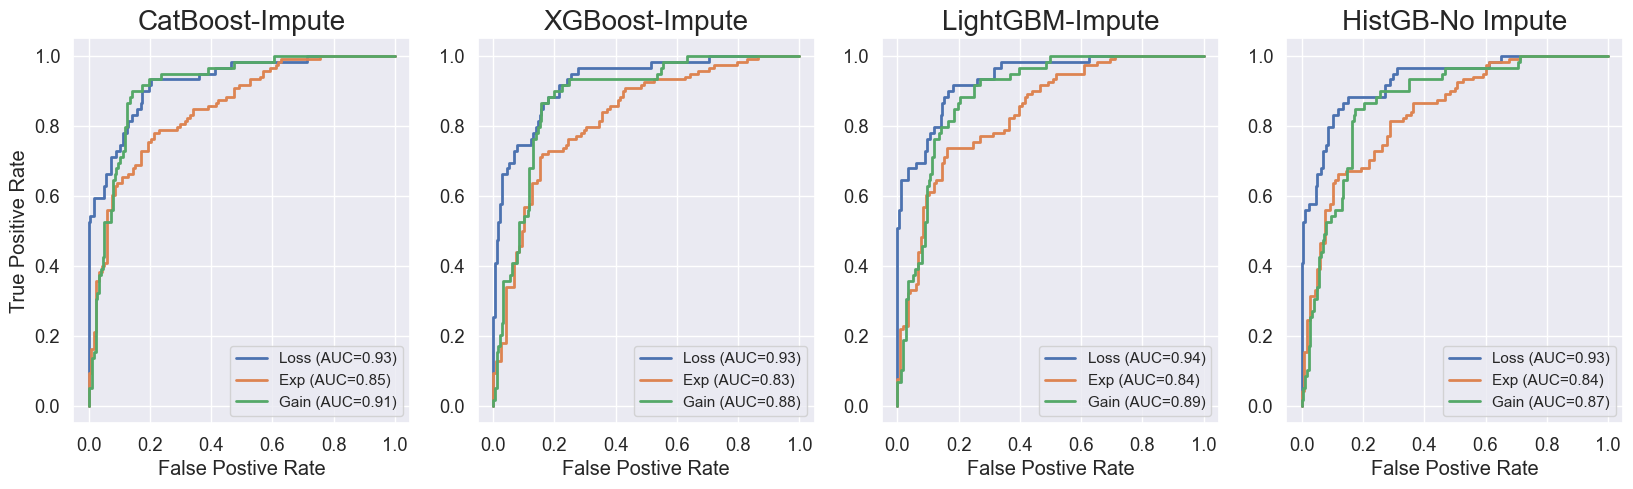

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test, columns = split_data(df.copy()) 
classes=[0, 1, 2]
y_test_bin=label_binarize(y_test, classes=classes)

fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,5))
sns.set(font_scale=1)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    fpr, tpr = {}, {}

    for c in classes:
        fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, c], results.loc[idx, 'predict_proba'][:, c])
        axes[i].plot(fpr[c], tpr[c], lw=2, label='{} (AUC={:0.2f})'.format(ticks(c,c+1), auc(fpr[c], tpr[c])))
    
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xlabel("False Postive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[i].legend(loc="best")

plt.show()

**Precision-Recall Curve**

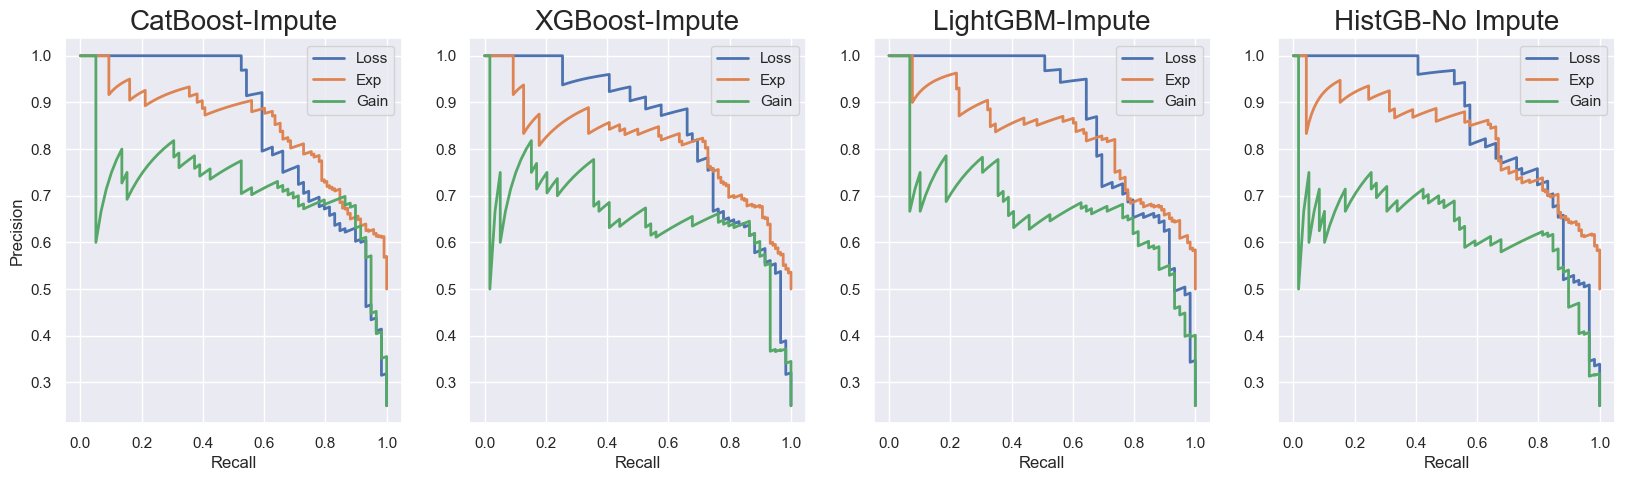

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test, columns = split_data(df.copy()) 
classes=[0, 1, 2]
y_test_bin=label_binarize(y_test, classes=classes)

fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,5))
sns.set(font_scale=1)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    prec, rec = {}, {}

    for c in classes:
        prec[c], rec[c], _ = precision_recall_curve(y_test_bin[:, c], results.loc[idx, 'predict_proba'][:, c])
        axes[i].plot(rec[c], prec[c], lw=2, label='{}'.format(ticks(c,c+1)))
    
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xlabel("Recall")
    axes[0].set_ylabel("Precision")
    axes[i].legend(loc="best")

plt.show()

In [25]:
temp

,Model,enc_ver,n features,n cat_features,best_params,Best Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,MCC,F1,conf_mat,Prediction,predict_proba,estimator,classification_report,Train Time CPU,Train Time Wall,n_iter
3,XGBoost,Impute,333,12,"{'n_estimators': 200, 'min_child_weight': 1, '...",0.720213,0.922340,0.707627,0.711331,0.707627,0.521777,0.704772,"[[39, 16, 4], [5, 96, 17], [3, 24, 32]]","[1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.0057792426, 0.5377764, 0.45644435], [0.240...","XGBClassifier(alpha=0.1, base_score=0.5, boost...",precision recall f1-score ...,18.375000,1747.495387,972
2,XGBoost,No Impute,333,12,"{'n_estimators': 200, 'min_child_weight': 1, '...",0.719149,0.928723,0.699153,0.696785,0.699153,0.508412,0.694779,"[[40, 14, 5], [8, 95, 15], [4, 25, 30]]","[1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.00555208, 0.5438056, 0.45064232], [0.26369...","XGBClassifier(alpha=0.1, base_score=0.5, boost...",precision recall f1-score ...,19.500000,2622.361859,972
5,LightGBM,Impute,333,12,"{'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estima...",0.720213,1.000000,0.703390,0.700919,0.703390,0.517420,0.700279,"[[41, 14, 4], [10, 93, 15], [4, 23, 32]]","[2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[[0.0033848471424482423, 0.4842420432607911, 0...","LGBMClassifier(force_col_wise=True, is_unbalan...",precision recall f1-score ...,15.765625,680.861254,972
4,LightGBM,No Impute,333,12,"{'reg_lambda': 10, 'reg_alpha': 0, 'n_estimato...",0.727660,0.951064,0.690678,0.688811,0.690678,0.495402,0.687315,"[[40, 15, 4], [7, 93, 18], [5, 24, 30]]","[1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.006141169098953994, 0.547470777367392, 0.4...","LGBMClassifier(force_col_wise=True, is_unbalan...",precision recall f1-score ...,15.375000,830.710740,972
6,HistGB,No Impute,333,12,"{'min_samples_leaf': 10, 'max_leaf_nodes': 10,...",0.744681,0.971277,0.716102,0.714114,0.716102,0.536178,0.711295,"[[41, 14, 4], [8, 97, 13], [4, 24, 31]]","[2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.0020261450425780943, 0.46747086741742083, ...",HistGradientBoostingClassifier(categorical_fea...,precision recall f1-score ...,38.953125,3554.721172,540
7,HistGB,Impute,333,12,"{'min_samples_leaf': 20, 'max_leaf_nodes': 31,...",0.736170,0.864894,0.711864,0.712745,0.711864,0.527647,0.705894,"[[40, 16, 3], [8, 98, 12], [3, 26, 30]]","[2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, ...","[[0.005210367356238218, 0.4853458269732152, 0....",HistGradientBoostingClassifier(categorical_fea...,precision recall f1-score ...,12.062500,3484.473306,540
1,CatBoost,Impute,333,12,"{'random_strength': 5, 'min_data_in_leaf': 1, ...",0.720213,1.000000,0.728814,0.728341,0.728814,0.557866,0.725576,"[[40, 15, 4], [10, 97, 11], [3, 21, 35]]","[[2], [2], [1], [1], [1], [2], [0], [1], [1], ...","[[0.009103541057511046, 0.46159434421363016, 0...",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,1258.031250,7357.755682,100
0,CatBoost,No Impute,333,12,"{'random_strength': 15, 'min_data_in_leaf': 5,...",0.743617,0.918085,0.728814,0.731423,0.728814,0.557455,0.721655,"[[42, 15, 2], [10, 100, 8], [5, 24, 30]]","[[2], [1], [1], [1], [1], [0], [0], [1], [2], ...","[[0.010062840872646243, 0.47797683526884405, 0...",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,9.015625,7172.620718,100


In [26]:
temp

,Model,enc_ver,n features,n cat_features,best_params,Best Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,MCC,F1,conf_mat,Prediction,predict_proba,estimator,classification_report,Train Time CPU,Train Time Wall,n_iter
3,XGBoost,Impute,333,12,"{'n_estimators': 200, 'min_child_weight': 1, '...",0.720213,0.922340,0.707627,0.711331,0.707627,0.521777,0.704772,"[[39, 16, 4], [5, 96, 17], [3, 24, 32]]","[1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.0057792426, 0.5377764, 0.45644435], [0.240...","XGBClassifier(alpha=0.1, base_score=0.5, boost...",precision recall f1-score ...,18.375000,1747.495387,972
2,XGBoost,No Impute,333,12,"{'n_estimators': 200, 'min_child_weight': 1, '...",0.719149,0.928723,0.699153,0.696785,0.699153,0.508412,0.694779,"[[40, 14, 5], [8, 95, 15], [4, 25, 30]]","[1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.00555208, 0.5438056, 0.45064232], [0.26369...","XGBClassifier(alpha=0.1, base_score=0.5, boost...",precision recall f1-score ...,19.500000,2622.361859,972
5,LightGBM,Impute,333,12,"{'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estima...",0.720213,1.000000,0.703390,0.700919,0.703390,0.517420,0.700279,"[[41, 14, 4], [10, 93, 15], [4, 23, 32]]","[2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[[0.0033848471424482423, 0.4842420432607911, 0...","LGBMClassifier(force_col_wise=True, is_unbalan...",precision recall f1-score ...,15.765625,680.861254,972
4,LightGBM,No Impute,333,12,"{'reg_lambda': 10, 'reg_alpha': 0, 'n_estimato...",0.727660,0.951064,0.690678,0.688811,0.690678,0.495402,0.687315,"[[40, 15, 4], [7, 93, 18], [5, 24, 30]]","[1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.006141169098953994, 0.547470777367392, 0.4...","LGBMClassifier(force_col_wise=True, is_unbalan...",precision recall f1-score ...,15.375000,830.710740,972
6,HistGB,No Impute,333,12,"{'min_samples_leaf': 10, 'max_leaf_nodes': 10,...",0.744681,0.971277,0.716102,0.714114,0.716102,0.536178,0.711295,"[[41, 14, 4], [8, 97, 13], [4, 24, 31]]","[2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, ...","[[0.0020261450425780943, 0.46747086741742083, ...",HistGradientBoostingClassifier(categorical_fea...,precision recall f1-score ...,38.953125,3554.721172,540
7,HistGB,Impute,333,12,"{'min_samples_leaf': 20, 'max_leaf_nodes': 31,...",0.736170,0.864894,0.711864,0.712745,0.711864,0.527647,0.705894,"[[40, 16, 3], [8, 98, 12], [3, 26, 30]]","[2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, ...","[[0.005210367356238218, 0.4853458269732152, 0....",HistGradientBoostingClassifier(categorical_fea...,precision recall f1-score ...,12.062500,3484.473306,540
1,CatBoost,Impute,333,12,"{'random_strength': 5, 'min_data_in_leaf': 1, ...",0.720213,1.000000,0.728814,0.728341,0.728814,0.557866,0.725576,"[[40, 15, 4], [10, 97, 11], [3, 21, 35]]","[[2], [2], [1], [1], [1], [2], [0], [1], [1], ...","[[0.009103541057511046, 0.46159434421363016, 0...",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,1258.031250,7357.755682,100
0,CatBoost,No Impute,333,12,"{'random_strength': 15, 'min_data_in_leaf': 5,...",0.743617,0.918085,0.728814,0.731423,0.728814,0.557455,0.721655,"[[42, 15, 2], [10, 100, 8], [5, 24, 30]]","[[2], [1], [1], [1], [1], [0], [0], [1], [2], ...","[[0.010062840872646243, 0.47797683526884405, 0...",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,9.015625,7172.620718,100


In [27]:
best_per_model_idx

[3, 5, 6, 1]